# **What is Pytorch?**

Pytorch is a python-based scientific computing package targeted for

1.   replacement for NumPy to use the power of GPUs
2.   deep learning research platform that provides maximum flexibility and speed



---


# **What is a Tensor?**

Similar to NumPy’s ndarrays, but can also be used on a GPU to accelerate computing.



In [1]:
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.8087, 0.4726, 0.2960],
        [0.9052, 0.0918, 0.8315],
        [0.2257, 0.5987, 0.0036],
        [0.0087, 0.7708, 0.7121],
        [0.0295, 0.5055, 0.1698]])


A tensor can have different datatypes;

In [2]:
x = torch.zeros(1, 3, dtype=torch.long)
print("\nx datatype:",x.dtype)
print("x: ", x)

y = torch.zeros(1, 3, dtype=torch.float)
print("\ny datatype:", y.dtype)
print("y: ", y)

z = torch.zeros(1, 3, dtype=torch.double)
print("\nz datatype:",z.dtype)
print("z: ", z)


x datatype: torch.int64
x:  tensor([[0, 0, 0]])

y datatype: torch.float32
y:  tensor([[0., 0., 0.]])

z datatype: torch.float64
z:  tensor([[0., 0., 0.]], dtype=torch.float64)


A tensor can be constructed
1. directly from data;

In [3]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


2. based on an existing tensor.

In [4]:
x = x.new_ones(2, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

y = torch.randn_like(x)                       #result will have the same size
print(y)

z = torch.randn_like(y, dtype=torch.float)    # override dtype!
print(z)

#get sizes of tensors;

print("\nSize of the tensors:\n",x.size(), y.size(), z.size())

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-1.4042, -1.1507,  0.3450],
        [ 0.5354,  1.6805, -0.7699]], dtype=torch.float64)
tensor([[ 0.1071, -0.6353, -1.0145],
        [-0.2794, -0.4673,  0.3808]])

Size of the tensors:
 torch.Size([2, 3]) torch.Size([2, 3]) torch.Size([2, 3])


Tensor indexing is similar to numpy

In [5]:
# Basic
x = torch.randint(0,10,size=(3,4,5)) # 3D tensor

print('Original Tensor x:')
print(x)
print('\n')

# Some valid ways of accessing individual elements in the tensor
print('x[0][0][0]\n', x[0][0][0])
print('x[1,2,3]\n', x[1,2,3])
print('x[-1,-1][2]\n', x[-1,-1][2])
print('x[-1,-1][-1]\n', x[-1,-1][-1])
print('\n')

Original Tensor x:
tensor([[[7, 3, 9, 9, 4],
         [9, 3, 0, 0, 0],
         [9, 8, 0, 1, 2],
         [0, 3, 6, 5, 9]],

        [[0, 1, 3, 4, 9],
         [2, 7, 2, 8, 1],
         [3, 3, 9, 8, 8],
         [4, 6, 4, 6, 6]],

        [[7, 5, 3, 3, 2],
         [4, 9, 2, 5, 5],
         [1, 9, 8, 4, 5],
         [9, 0, 0, 9, 7]]])


x[0][0][0]
 tensor(7)
x[1,2,3]
 tensor(8)
x[-1,-1][2]
 tensor(0)
x[-1,-1][-1]
 tensor(7)




Tensors can be sliced

In [6]:
print('Original Tensor x:')
print(x)
print('\n')

print('x[0] (first dim.) \n', x[0].shape,'\n',x[0])
print('x[:1] (first dim.) \n', x[:1].shape,'\n',x[:1])
print('x[:,1] (all dim. row=1) \n', x[:,1])
print('x[:,:,3] (all dim. all rows but only 3rd column) \n', x[:,:,3].shape,'\n',x[:,:,3])
print('x[:,:,-2:] (all dim., all rows but last 2 columns) \n',x[:,:,-2:].shape,'\n', x[:,:,-2:])

Original Tensor x:
tensor([[[7, 3, 9, 9, 4],
         [9, 3, 0, 0, 0],
         [9, 8, 0, 1, 2],
         [0, 3, 6, 5, 9]],

        [[0, 1, 3, 4, 9],
         [2, 7, 2, 8, 1],
         [3, 3, 9, 8, 8],
         [4, 6, 4, 6, 6]],

        [[7, 5, 3, 3, 2],
         [4, 9, 2, 5, 5],
         [1, 9, 8, 4, 5],
         [9, 0, 0, 9, 7]]])


x[0] (first dim.) 
 torch.Size([4, 5]) 
 tensor([[7, 3, 9, 9, 4],
        [9, 3, 0, 0, 0],
        [9, 8, 0, 1, 2],
        [0, 3, 6, 5, 9]])
x[:1] (first dim.) 
 torch.Size([1, 4, 5]) 
 tensor([[[7, 3, 9, 9, 4],
         [9, 3, 0, 0, 0],
         [9, 8, 0, 1, 2],
         [0, 3, 6, 5, 9]]])
x[:,1] (all dim. row=1) 
 tensor([[9, 3, 0, 0, 0],
        [2, 7, 2, 8, 1],
        [4, 9, 2, 5, 5]])
x[:,:,3] (all dim. all rows but only 3rd column) 
 torch.Size([3, 4]) 
 tensor([[9, 0, 1, 5],
        [4, 8, 8, 6],
        [3, 5, 4, 9]])
x[:,:,-2:] (all dim., all rows but last 2 columns) 
 torch.Size([3, 4, 2]) 
 tensor([[[9, 4],
         [0, 0],
         [1, 2],

---
# **Tensor Operations:**


##Operations can be performed with different syntaxes. For addition;

In [7]:
#syntax 1:
x = torch.rand(2, 3)
y = torch.randn_like(x)
print(x + y)

tensor([[-1.1143, -0.3422, -1.5102],
        [-0.2599,  0.4454,  0.3359]])


In [8]:
#syntax 2:
print(torch.add(x, y))

tensor([[-1.1143, -0.3422, -1.5102],
        [-0.2599,  0.4454,  0.3359]])


In [9]:
#syntax 4: in-place, post-fixed with an _
print(y)

y.add_(x)

print(y)

tensor([[-1.3378, -0.6942, -2.0378],
        [-0.6628, -0.5455, -0.0611]])
tensor([[-1.1143, -0.3422, -1.5102],
        [-0.2599,  0.4454,  0.3359]])


In [10]:
#syntax 3: an output tensor as argument
result = torch.empty(2, 3)
print(result)
torch.add(x, y, out=result)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


tensor([[-0.8907,  0.0099, -0.9825],
        [ 0.1429,  1.4362,  0.7329]])

##Reduction operations (sum(), mean(), std(), max(), argmax(), prod(), unique() etc.)

In [11]:
x1 = torch.ones(3)
x2 = torch.ones(size=(3,4))

print('\noriginal x1:')
print(x1)

print('\noriginal x2:')
print(x2)

print('\nx1.sum()')
print(x1.sum())
print(torch.sum(x1))

print('\nx2.sum()')
print(x2.sum())
print(torch.sum(x2))

print('\nx2.sum(axis=0)')
print(x2.sum(axis=0))
print(torch.sum(x2, axis=0))

print('\nx2.sum(axis=1)')
print(x2.sum(axis=1))
print(torch.sum(x2, axis=1))


original x1:
tensor([1., 1., 1.])

original x2:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

x1.sum()
tensor(3.)
tensor(3.)

x2.sum()
tensor(12.)
tensor(12.)

x2.sum(axis=0)
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])

x2.sum(axis=1)
tensor([4., 4., 4.])
tensor([4., 4., 4.])


---
# **Handling Tensors:**

## Resize/reshape a tensor with `torch.view` and `torch.reshape`

### torch.view

In [12]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())
print(x)

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([[-0.5135,  0.2299, -0.7517, -0.5847],
        [ 0.7409,  0.0925, -1.3172, -1.6695],
        [ 0.6125,  1.1950, -0.5464, -2.3114],
        [ 0.0335,  0.0708,  0.4559, -0.5392]])


### torch.reshape

In [13]:
x = torch.randint(0,100,size=(3,4,5))
print('Orginal tensor shape: ', x.shape)
print('Orginal tensor: ')
print(x)
print('\n')
print("----------------")
print('Shape to have 12 rows and 5 columns (x.reshape((12,5))): \n')
print(x.reshape((12,5)), x.reshape((12,5)).shape)
print('\n')
print("----------------")
print('Shape to have 10 rows and using -1 to infer based on the elements in other dimensions (x.reshape(10,-1)): \n')
print(x.reshape(10,-1), x.reshape(10,-1).shape) # Can use -1 to specify one of the dimensions which is automatically inferred based on the elements in other dimensions
print("----------------")
print('\n')
print('Reshape to have 4 rows and 3 columns (x.reshape(5,4,3)): \n')
print(x.reshape(5,4,3), x.reshape(5,4,3).shape)
print('\n')
print("----------------")
print('Reshape to single dimension (x.reshape(-1))\n')
print(x.reshape(-1), x.reshape(-1).shape)

Orginal tensor shape:  torch.Size([3, 4, 5])
Orginal tensor: 
tensor([[[51, 70, 80, 36, 32],
         [60, 87, 10, 16, 87],
         [52, 89,  3, 54, 18],
         [45, 79, 14, 18, 68]],

        [[64, 52, 62, 19, 29],
         [78, 88, 97, 89, 14],
         [57, 84, 43,  1, 53],
         [99, 69, 61, 81, 39]],

        [[54, 45,  8, 38,  6],
         [87, 67, 13, 43, 42],
         [63, 86, 25, 89, 51],
         [10, 67, 97, 23, 31]]])


----------------
Shape to have 12 rows and 5 columns (x.reshape((12,5))): 

tensor([[51, 70, 80, 36, 32],
        [60, 87, 10, 16, 87],
        [52, 89,  3, 54, 18],
        [45, 79, 14, 18, 68],
        [64, 52, 62, 19, 29],
        [78, 88, 97, 89, 14],
        [57, 84, 43,  1, 53],
        [99, 69, 61, 81, 39],
        [54, 45,  8, 38,  6],
        [87, 67, 13, 43, 42],
        [63, 86, 25, 89, 51],
        [10, 67, 97, 23, 31]]) torch.Size([12, 5])


----------------
Shape to have 10 rows and using -1 to infer based on the elements in other dimensi

## Get the value as a Python number from a one element tensor

In [14]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.0499])
-0.049882568418979645


## Multidimensional tensors can be changed to singe dimension with Flatten

In [15]:
#x = torch.rand(size=(3,4,5)) # 3D tensor
x = torch.randint(0,20,size=(3,4,5))  # 3D tensor
print(x)
print(x.shape)               # 3x4x5
print(x.flatten())
print(x.flatten().shape)     # 60

tensor([[[16, 13, 10,  9, 18],
         [ 5,  9,  2,  7, 12],
         [18,  3, 11, 17, 18],
         [12, 11,  4,  9, 14]],

        [[ 2, 14, 15,  4, 17],
         [10, 11, 19,  1, 14],
         [ 5, 15, 15,  4,  4],
         [19,  6, 10, 14,  7]],

        [[18, 12, 15, 16,  0],
         [ 8,  2,  2,  1, 17],
         [ 9,  5, 12, 17, 17],
         [ 4, 19, 18,  1, 19]]])
torch.Size([3, 4, 5])
tensor([16, 13, 10,  9, 18,  5,  9,  2,  7, 12, 18,  3, 11, 17, 18, 12, 11,  4,
         9, 14,  2, 14, 15,  4, 17, 10, 11, 19,  1, 14,  5, 15, 15,  4,  4, 19,
         6, 10, 14,  7, 18, 12, 15, 16,  0,  8,  2,  2,  1, 17,  9,  5, 12, 17,
        17,  4, 19, 18,  1, 19])
torch.Size([60])


##Dimensions can be added or removed with squeeze and unsqueeze

   ### Add dimension with unsequeeze

In [17]:
#x = torch.rand(size=(3,4,5))
x = torch.randint(0,20,size=(3,4,5))
xs = x.unsqueeze(dim=0)   # unsequeeze along axis 0
xs2 = x.unsqueeze(1)  # unsequeeze along axis 1

print(xs) # A new dimension is added while all the following dimension are incremented by 1 ( positionally)
print('\n')
print('Original tensor shape',x.shape)
print('Unsequeeze along axis 0 (xs=x.unsqueeze(dim=0))',xs.shape)
print('\n')

print(xs.unsqueeze(0)) # Can apply this operation as many times as required
print('Unsequeeze along axis 0 a second time (xs.unsqueeze(0).shape):',xs.unsqueeze(0).shape)
print('\n')
print("---------\n")
print('\n')
print('Original tensor\n')
print(x)
print('Unsequeeze along axis 1 (x.unsqueeze(1)) : ',xs2.shape)

print(xs2) # Unsqueeze can also be applied to other intermediate dimensions
print('\n')
xs3=x.unsqueeze(2)
print(xs3.shape)
print('Unsequeeze along axis 2 (x.unsqueeze(2)) : ',xs3.shape)

tensor([[[[ 3, 14, 14, 10,  4],
          [11,  7,  1,  5, 12],
          [16, 16,  4, 14,  3],
          [ 5,  5,  5, 11,  5]],

         [[14, 16,  1,  9, 12],
          [15,  0, 19,  1,  2],
          [17, 14,  3, 13,  2],
          [ 1, 13, 18, 13, 18]],

         [[ 4, 11,  6, 10,  3],
          [ 3,  5,  8,  0,  7],
          [ 3,  4, 19, 19, 12],
          [ 2, 12,  9,  9,  1]]]])


Original tensor shape torch.Size([3, 4, 5])
Unsequeeze along axis 0 (xs=x.unsqueeze(dim=0)) torch.Size([1, 3, 4, 5])


tensor([[[[[ 3, 14, 14, 10,  4],
           [11,  7,  1,  5, 12],
           [16, 16,  4, 14,  3],
           [ 5,  5,  5, 11,  5]],

          [[14, 16,  1,  9, 12],
           [15,  0, 19,  1,  2],
           [17, 14,  3, 13,  2],
           [ 1, 13, 18, 13, 18]],

          [[ 4, 11,  6, 10,  3],
           [ 3,  5,  8,  0,  7],
           [ 3,  4, 19, 19, 12],
           [ 2, 12,  9,  9,  1]]]]])
Unsequeeze along axis 0 a second time (xs.unsqueeze(0).shape): torch.Size([1, 1, 3, 

### Remove dimension with sequeeze

In [18]:
print("xs.shape : ",xs.shape)
print('Original tensor xs\n')
print(xs)
print("sequeze axis 0 xs.squeeze(0)")
print(xs.squeeze(0))
print('xs.squeeze(0).shape:',xs.squeeze(0).shape)
print('\n')
print("-------------")
print("xs2.shape : ",xs2.shape)
print('Original tensor xs2\n')
print(xs2)
print("sequeze axis 1 with xs2.squeeze(1)")
print(xs2.squeeze(1))
print('xs2.squeeze(1).shape:',xs2.squeeze(1).shape)
print('\n')



xs.shape :  torch.Size([1, 3, 4, 5])
Original tensor xs

tensor([[[[ 3, 14, 14, 10,  4],
          [11,  7,  1,  5, 12],
          [16, 16,  4, 14,  3],
          [ 5,  5,  5, 11,  5]],

         [[14, 16,  1,  9, 12],
          [15,  0, 19,  1,  2],
          [17, 14,  3, 13,  2],
          [ 1, 13, 18, 13, 18]],

         [[ 4, 11,  6, 10,  3],
          [ 3,  5,  8,  0,  7],
          [ 3,  4, 19, 19, 12],
          [ 2, 12,  9,  9,  1]]]])
sequeze axis 0 xs.squeeze(0)
tensor([[[ 3, 14, 14, 10,  4],
         [11,  7,  1,  5, 12],
         [16, 16,  4, 14,  3],
         [ 5,  5,  5, 11,  5]],

        [[14, 16,  1,  9, 12],
         [15,  0, 19,  1,  2],
         [17, 14,  3, 13,  2],
         [ 1, 13, 18, 13, 18]],

        [[ 4, 11,  6, 10,  3],
         [ 3,  5,  8,  0,  7],
         [ 3,  4, 19, 19, 12],
         [ 2, 12,  9,  9,  1]]])
xs.squeeze(0).shape: torch.Size([3, 4, 5])


-------------
xs2.shape :  torch.Size([3, 1, 4, 5])
Original tensor xs2

tensor([[[[ 3, 14, 14, 10, 

## Combining Tensors

### Concatenate

In [20]:
x1 = torch.randint(0,10,size=(2,3,4))
x2 = torch.randint(0,10,size=(2,3,4))

print('x1:\n', x1, "\n")
print('x2:\n', x2, "\n")

print('CONCATENATING TENSORS\n')

print('Concatenating two tensors along axis 1 (torch.cat([x1,x2],dim=1))')
print(torch.cat([x1,x2],dim=1))
print('New Shape: ', torch.cat([x1,x2],dim=1).shape)

x1:
 tensor([[[5, 5, 9, 9],
         [2, 6, 4, 8],
         [8, 7, 1, 6]],

        [[0, 6, 8, 9],
         [0, 3, 1, 6],
         [2, 0, 2, 7]]]) 

x2:
 tensor([[[9, 3, 1, 7],
         [2, 4, 1, 9],
         [0, 1, 4, 9]],

        [[7, 7, 0, 7],
         [7, 6, 4, 6],
         [2, 4, 2, 7]]]) 

CONCATENATING TENSORS

Concatenating two tensors along axis 1 (torch.cat([x1,x2],dim=1))
tensor([[[5, 5, 9, 9],
         [2, 6, 4, 8],
         [8, 7, 1, 6],
         [9, 3, 1, 7],
         [2, 4, 1, 9],
         [0, 1, 4, 9]],

        [[0, 6, 8, 9],
         [0, 3, 1, 6],
         [2, 0, 2, 7],
         [7, 7, 0, 7],
         [7, 6, 4, 6],
         [2, 4, 2, 7]]])
New Shape:  torch.Size([2, 6, 4])


In [21]:
# x1 shape (2,3,4)
# x2 shape (2,3,4)

x3 = torch.randint(0,10,size=(1,3,4))
x4 = torch.randint(0,10,size=(2,3,1))
print('\nConcatenating three tensors (x1,x2,x3) along axis 0\n')
print("x1 shape (2,3,4) : \n",x1,"\n")
print("x2 shape (2,3,4) : \n",x2,"\n")
print('x3 (size=(1,3,4)):\n', x3, "\n")
print('Concatenate with torch.cat([x1,x2,x3],dim=0)')
print(torch.cat([x1,x2,x3],dim=0))
print('New Shape: ', torch.cat([x1,x2,x3],dim=0).shape)
print("---------------------------")
print('\nConcatenating three tensors (x1,x2,x4) along axis 2\n')
print("x1 shape (2,3,4) : \n",x1,"\n")
print("x2 shape (2,3,4) : \n",x2,"\n")
print('x4 (size=(2,3,1)):\n', x4, "\n")

print('Concatenate with torch.cat([x1,x2,x4],dim=2)')
print(torch.cat([x1,x2,x4],dim=2))
print('New Shape: ', torch.cat([x1,x2,x4],dim=2).shape)


Concatenating three tensors (x1,x2,x3) along axis 0

x1 shape (2,3,4) : 
 tensor([[[5, 5, 9, 9],
         [2, 6, 4, 8],
         [8, 7, 1, 6]],

        [[0, 6, 8, 9],
         [0, 3, 1, 6],
         [2, 0, 2, 7]]]) 

x2 shape (2,3,4) : 
 tensor([[[9, 3, 1, 7],
         [2, 4, 1, 9],
         [0, 1, 4, 9]],

        [[7, 7, 0, 7],
         [7, 6, 4, 6],
         [2, 4, 2, 7]]]) 

x3 (size=(1,3,4)):
 tensor([[[5, 1, 6, 8],
         [2, 2, 1, 5],
         [1, 1, 7, 0]]]) 

Concatenate with torch.cat([x1,x2,x3],dim=0)
tensor([[[5, 5, 9, 9],
         [2, 6, 4, 8],
         [8, 7, 1, 6]],

        [[0, 6, 8, 9],
         [0, 3, 1, 6],
         [2, 0, 2, 7]],

        [[9, 3, 1, 7],
         [2, 4, 1, 9],
         [0, 1, 4, 9]],

        [[7, 7, 0, 7],
         [7, 6, 4, 6],
         [2, 4, 2, 7]],

        [[5, 1, 6, 8],
         [2, 2, 1, 5],
         [1, 1, 7, 0]]])
New Shape:  torch.Size([5, 3, 4])
---------------------------

Concatenating three tensors (x1,x2,x4) along axis 2

x1 shap

### Stacking (similar to a combination of unsqueeze and cat)

In [22]:
x1 = torch.randint(0,10,size=(3,4))
x2 = torch.randint(0,10,size=(3,4))
print('x1: \n')
print(x1.shape)
print(x1)
print('\n')
print('x2: \n')
print(x2.shape)
print(x2)
print('\n')

print('stack x1 and x2 at dim=0 : (3, 4) --> (1, 3, 4) --> (N, 3, 4) \n')
print(torch.stack([x1,x2],dim=0)) #(3, 4) --> (1, 3, 4) --> (N, 3, 4)
print("New Shape:", torch.stack([x1,x2],dim=0).shape, '\n')
print('stack x1 and x2 at dim=1: (3, 4) --> (3, 1, 4) --> (3, N, 4) \n')
print(torch.stack([x1,x2],dim=1)) #(3, 4) --> (3, 1, 4) --> (3, N, 4)
print("New Shape:", torch.stack([x1,x2],dim=1).shape, '\n')
print('stack x1 and x2 at dim=2: (3, 4) --> (3, 4, 1) --> (3, 4, N) \n')
print(torch.stack([x1,x2],dim=2)) #(3, 4) --> (3, 4, 1) --> (3, 4, N)
print("New Shape:", torch.stack([x1,x2],dim=2).shape, '\n')

x1: 

torch.Size([3, 4])
tensor([[1, 8, 4, 9],
        [8, 2, 0, 8],
        [9, 3, 7, 0]])


x2: 

torch.Size([3, 4])
tensor([[3, 6, 8, 6],
        [0, 8, 8, 0],
        [4, 2, 4, 8]])


stack x1 and x2 at dim=0 : (3, 4) --> (1, 3, 4) --> (N, 3, 4) 

tensor([[[1, 8, 4, 9],
         [8, 2, 0, 8],
         [9, 3, 7, 0]],

        [[3, 6, 8, 6],
         [0, 8, 8, 0],
         [4, 2, 4, 8]]])
New Shape: torch.Size([2, 3, 4]) 

stack x1 and x2 at dim=1: (3, 4) --> (3, 1, 4) --> (3, N, 4) 

tensor([[[1, 8, 4, 9],
         [3, 6, 8, 6]],

        [[8, 2, 0, 8],
         [0, 8, 8, 0]],

        [[9, 3, 7, 0],
         [4, 2, 4, 8]]])
New Shape: torch.Size([3, 2, 4]) 

stack x1 and x2 at dim=2: (3, 4) --> (3, 4, 1) --> (3, 4, N) 

tensor([[[1, 3],
         [8, 6],
         [4, 8],
         [9, 6]],

        [[8, 0],
         [2, 8],
         [0, 8],
         [8, 0]],

        [[9, 4],
         [3, 2],
         [7, 4],
         [0, 8]]])
New Shape: torch.Size([3, 4, 2]) 



### Tensor Padding

In [ ]:
from torch.nn import functional as F

x = torch.tensor([[1,2,3,4],
                 [1,2,3,4],
                 [1,2,3,4],
                 [1,2,3,4]])

pad_left   = 1
pad_right  = 2
pad_top    = 1
pad_bottom = 2

x_pad = F.pad(x, (pad_left,pad_right,pad_top,pad_bottom), mode = 'constant', value=100)
print(x_pad)

tensor([[100, 100, 100, 100, 100, 100, 100],
        [100,   1,   2,   3,   4, 100, 100],
        [100,   1,   2,   3,   4, 100, 100],
        [100,   1,   2,   3,   4, 100, 100],
        [100,   1,   2,   3,   4, 100, 100],
        [100, 100, 100, 100, 100, 100, 100],
        [100, 100, 100, 100, 100, 100, 100]])


For 100+ Tensor operations you can visit;

https://pytorch.org/docs/stable/torch.html

---



---
# **Vector/Matrix operations**

##Vector-Vector

In [23]:
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)

print('tensor1')
print(tensor1.size())
print(tensor1,'\n')

print('tensor2')
print(tensor2.size())
print(tensor2,'\n')

print('===========\n')
print('tensor1 @ tensor2')
print((tensor1 @ tensor2).size())
print(tensor1 @ tensor2)
print('\n')
print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print(torch.matmul(tensor1, tensor2),'\n')

tensor1
torch.Size([3])
tensor([ 1.1319,  1.8897, -0.3477]) 

tensor2
torch.Size([3])
tensor([-0.6121, -1.1688,  0.9362]) 


tensor1 @ tensor2
torch.Size([])
tensor(-3.2270)


torch.matmul(tensor1, tensor2)
torch.Size([])
tensor(-3.2270) 



##Vector-Matrix

In [24]:
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)

print('tensor1')
print(tensor1.size())
print(tensor1,'\n')

print('tensor2')
print(tensor2.size())
print(tensor2,'\n')

print('===========\n')
print('tensor1 @ tensor2')
print((tensor1 @ tensor2).size())
print(tensor1 @ tensor2)
print('\n')
print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print(torch.matmul(tensor1, tensor2),'\n')

tensor1
torch.Size([3, 4])
tensor([[ 0.9891,  0.9550, -0.0259,  1.8527],
        [ 1.2553,  2.0246,  1.0859,  0.8375],
        [ 0.1375,  0.3019,  0.5415,  1.1993]]) 

tensor2
torch.Size([4])
tensor([-1.2244, -0.3910,  0.4502,  0.3181]) 


tensor1 @ tensor2
torch.Size([3])
tensor([-1.0068, -1.5733,  0.3389])


torch.matmul(tensor1, tensor2)
torch.Size([3])
tensor([-1.0068, -1.5733,  0.3389]) 



##Matrix-Matrix

In [25]:
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4, 5)

print('tensor1')
print(tensor1.size())
print(tensor1,'\n')

print('tensor2')
print(tensor2.size())
print(tensor2,'\n')

print('===========\n')
print('tensor1 @ tensor2')
print((tensor1 @ tensor2).size())
print(tensor1 @ tensor2)
print('\n')
print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print(torch.matmul(tensor1, tensor2),'\n')

tensor1
torch.Size([3, 4])
tensor([[ 0.8742,  0.7288, -0.7915,  0.5332],
        [ 0.1927, -0.3815, -1.1066, -1.1460],
        [-0.7005, -1.6357,  0.6566, -2.0769]]) 

tensor2
torch.Size([4, 5])
tensor([[ 1.6707, -0.3872, -1.2831, -0.7333, -0.6577],
        [-0.4552, -1.5502,  0.0746,  1.2933, -0.3359],
        [ 0.5701,  0.2632,  1.3424, -0.2436,  2.4322],
        [-1.0749, -0.7285,  1.7016, -0.7938,  2.1063]]) 


tensor1 @ tensor2
torch.Size([3, 5])
tensor([[ 0.1042, -2.0651, -1.2225,  0.0711, -1.6218],
        [ 1.0966,  1.0605, -3.7112,  0.5446, -5.1038],
        [ 2.1811,  4.4926, -1.8759, -0.1129, -1.7677]])


torch.matmul(tensor1, tensor2)
torch.Size([3, 5])
tensor([[ 0.1042, -2.0651, -1.2225,  0.0711, -1.6218],
        [ 1.0966,  1.0605, -3.7112,  0.5446, -5.1038],
        [ 2.1811,  4.4926, -1.8759, -0.1129, -1.7677]]) 



In [26]:
tensor1 = torch.randn(2, 3, 4)
tensor2 = torch.randn(2, 4, 5)

print('tensor1')
print(tensor1.size())
print(tensor1,'\n')

print('tensor2')
print(tensor2.size())
print(tensor2,'\n')

print('===========\n')
print('tensor1 @ tensor2')
print((tensor1 @ tensor2).size())
print(tensor1 @ tensor2)
print('\n')
print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print(torch.matmul(tensor1, tensor2),'\n')

tensor1
torch.Size([2, 3, 4])
tensor([[[ 0.1660, -0.4447, -0.5241,  1.0165],
         [ 0.8900,  0.4053,  1.6261,  0.7469],
         [-0.6327,  0.5627,  0.4088, -0.3258]],

        [[-1.7098, -0.7971,  0.9406,  0.7309],
         [-0.0399,  0.0482, -1.9160, -1.7570],
         [ 1.2088, -1.5576,  0.3302,  1.1911]]]) 

tensor2
torch.Size([2, 4, 5])
tensor([[[-1.8116, -1.8630,  0.5306, -1.1185,  0.4121],
         [ 2.3589,  1.8304,  0.6648, -1.5546,  1.4902],
         [-0.9655,  1.0674, -0.9448,  0.1249, -1.0627],
         [-0.2957,  0.3560,  0.2481, -0.0909,  1.0653]],

        [[ 0.8747,  0.7209, -0.3043,  0.0740, -0.0213],
         [-0.1245, -1.0682, -1.0355, -0.1836,  1.4178],
         [ 0.8228,  0.0829,  1.0561,  1.3416,  0.0135],
         [ 0.9490, -0.8745, -0.5836, -1.1490, -1.5975]]]) 


tensor1 @ tensor2
torch.Size([2, 3, 5])
tensor([[[-1.1442, -1.3206,  0.5398,  0.3478,  1.0456],
         [-2.4472,  1.0855, -0.6094, -1.4904,  0.0384],
         [ 2.1749,  2.5289, -0.4287, -0.0865,

---
# **Converting a Torch tensor to a NumPy array, and vice versa**

Torch tensors and numpy arrays can be converted to each other.

In [27]:
#tensor to numpy
x = torch.ones(5)
print(x)
y = x.numpy()
print(y)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [28]:
#numpy to tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


If underlying memory locations is on CPU, changing one will change the other;

In [29]:
x.add_(1)
print(x)
print(y)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [30]:
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


---
# **CUDA Tensors**

Tensors can be moved onto any device using the `.to` method

In [44]:
# run this cell only if CUDA is available
# Use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!


tensor([3., 3., 3., 3., 3.], device='cuda:0')
tensor([3., 3., 3., 3., 3.], dtype=torch.float64)



---


---
# **`Autograd` Package**



* Provides automatic differentiation for all operations on Tensors
* A define-by-run framework (backprop is defined by how the code is run, and that every single iteration can be different)
* If the attribute `.requires_grad`  of a tensor is set to as `True`, all opeations on the tensor will be tracked


In [31]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
y = x + 2
print(y)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [32]:
#y was created as a result of an operation, so it has a grad_fn.
print(y.grad_fn)

In [33]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [34]:
#change an existing tensor’s requires_grad flag in-place

a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


* When the computation is finished, `.backward()` can be calle to compute all the gradients automatically (gadient will be accumulated into `.grad` attribute)


In [35]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


* You can also stop autograd from tracking history by wrapping the code block in with torch.no_grad():

In [36]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


* For more infomation: https://pytorch.org/docs/stable/autograd.html#function



---



---
# **Neural Networks (NN)**

* NN can be construted with `torch.nn` package.



In [37]:
import torch.nn as nn

* nn depends on autograd to define models and differentiate them.
* A typical training procedure for a neural network is as follows:

    **i.** Define the neural network that has some learnable parameters (or weights).
    
    > The learnable parameters of a model are returned by net.parameters()

  **ii.** Iterate over a dataset of inputs

    **iii.** Process input through the network

    **iv.** Compute the loss (how far is the output from being correct).

    **v.** Propagate gradients back into the network’s parameters with loss.backward()

    **vi.** Update the weights of the network.

    > This can be performed by any of the various different update rules that are implemented in `torch.optim` package


In [39]:
#CREATE INPUT, AND OUTPUT

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)
print(x.size(), y.size())

torch.Size([64, 1000]) torch.Size([64, 10])


In [40]:
#DEFINE NN:

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    #ReLU: rectified linear unit, activation function
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
print(model)

Sequential(
  (0): Linear(in_features=1000, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
)


In [44]:
#LEARNABLE PARAMETERS IN THE MODEL:
params = list(model.parameters())
print("Length of learnable parameters: ",len(params))
print("Size of the first parameter: ", params[0].size())

Length of learnable parameters:  4
Size of the first parameter:  torch.Size([100, 1000])


In [45]:
# WE WILL NEED A LOSS FUNCTION FOR STEP iv.

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')
print("Loss function:", loss_fn)

Loss function: MSELoss()


In [47]:
# TO UPDATE WEIGHTS, LETS USE ADAM
# THAT IS ALREAY IMPLEMENTED IN torch.optim
import torch.optim as optim


learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print("Optimizer: ", optimizer)

Optimizer:  Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)


In [49]:
 #TRAINING LOOP:
for t in range(500):

    # Forward pass:
    # Feed input to the model
    # and compute predicted.

    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    #with torch.no_grad():
    #    for param in model.parameters():
    #        param -= learning_rate * param.grad


    # and update the weights.

    optimizer.step()

99 2.2021669210392503e-10
199 3.12144025904626e-11
299 1.2418375355816025e-11
399 8.005280466294451e-12
499 5.829103692789328e-12


---
# **Training an image classifier**

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using torchvision
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

**1. Loading and normalizing CIFAR10**

In [50]:
import torch
import torchvision
import torchvision.transforms as transforms

########################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


0.0%

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data


/Users/aryansharanreddyguda/miniconda3/envs/nndl/lib/python3.12/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


Files already downloaded and verified


Let us show some of the training images, for fun.

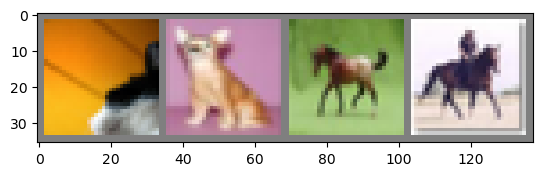

  cat   dog horse horse


In [52]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**2. Define a Convolutional Neural Network**

CNNs systematically apply learned filters to input images in order to
create feature maps that summarize the presence of those features in the input.

We will use Conv2d for convolution layers. It applies a 2D convolution over an input signal composed of several input planes.


Conv2D input :

N is the batch size, C is the number of channels, H is the height of input planes and W is width

$(N,C_{in},H_{in},W_{in})$ or  $(C_{in},H_{in},W_{in})$

Conv2D output:

$H_{out} = \frac{H_{in} + 2 * padding[0] - dilation[0]*(kernel_{-}size[0]-1)-1}{stride[0]} +1$

$W_{out} = \frac{W_{in} + 2 * padding[1] - dilation[1]*(kernel_{-}size[1]-1)-1}{stride[1]} +1$


In [53]:
import torch.nn as nn
import torch.nn.functional as F

#if we use equation given above
#input size:   32x32x3
#After conv1   28x28x6
#After pooling 14x14x6
#After conv2   10x10x16
#After pooling 5x5x16

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #takes 3-channel images, 6 output channels, 5x5 square convolution kernel
        #initialize 6 5x5-kernels, each having a total of 3 channels
        #color images of 32x32 pixels in size
        self.conv1 = nn.Conv2d(3, 6, 5)

        #A limitation of the feature map output of convolutional
        #layers is that they record the precise position of features
        #in the input. This means that small movements in the
        #position of the feature in the input image will result in a
        #different feature map.This can happen with re-cropping, rotation,
        #shifting, and other minor changes to the input image.
        #A common approach to addressing this problem from signal
        #processing is called down sampling. This is where a lower
        #resolution version of an input signal is created that still
        #contains the large or important structural elements.
        #A more robust and common approach is to use a POOLING LAYER.
        #A pooling layer is a new layer added
        #after the convolutional layer.
        #The pooling layer operates upon each feature map separately
        #to create a new set of the same number of pooled feature maps.
        #The size of the pooling operation or filter is smaller than the
        #size of the feature map
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


**3. Define a Loss function and optimizer**

Let’s use a Classification Cross-Entropy loss and  stochastic gradient descent (SGD) with momentum.

In [54]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**4. Train the network**

We will loop over our data iterator, and feed the inputs to the network and optimize.

In [55]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.191
[1,  4000] loss: 1.900
[1,  6000] loss: 1.702
[1,  8000] loss: 1.592
[1, 10000] loss: 1.512
[1, 12000] loss: 1.465
[2,  2000] loss: 1.395
[2,  4000] loss: 1.375
[2,  6000] loss: 1.333
[2,  8000] loss: 1.298
[2, 10000] loss: 1.306
[2, 12000] loss: 1.251
Finished Training


**5. Test the network on the test data**

We need to check if the network has learnt anything at all.
We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

First,  let us display an image from the test set to get familiar.

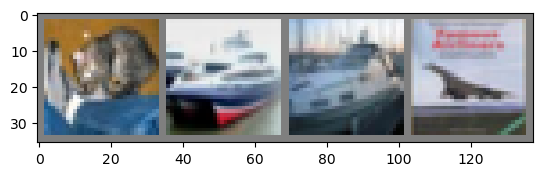

GroundTruth:    cat  ship  ship plane


In [56]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Now let us see what the neural network thinks these examples above are:

In [57]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


The results seem pretty good. Let us look at how the network performs on the whole dataset.

In [58]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
